# Unraveling Pittsburgh's Transit Problem

![title](20220131awBridgeBus02-1664556418.jpg)


# Intro
   I’ve had to ride Pittsburgh's buses a lot in my life. From the age of 14 I've been taking them almost daily. What never fails to surprise me is how terrible they always are. For my data story I wanted to take a look at how the Pittsburgh bus routes were laid out. I had the idea to look at underrepresented communities when I went to Stanton Heights for a meeting for my summer internship. I had to get back downtown to the office and the closest bus stop was 2 miles away and down a long hill.
	I went to look at what other pittsburghers thought about the public transport system. None saw it as amazing but something I noticed when doing research was that people strongly recommended finding a house near your work due to Pittsburgh’s lacking public transit. Limiting houses you can live in if you're transit dependent seems very limiting especially if you don't have the ability to move anytime you need a job across town. I wanted to get an understanding on how the bus routes were laid out. If they were put in areas where rich people lived, maybe they were centralized around poor communities? Were they focused only on locations with high populations or was it evenly distributed?
    When viewed from a map locations in Pittsburgh seem relativly easy to travel between. However when trying to get between two close places using public transit things can get much harder. For example, to get from south oakland to polish hill (they're about two miles apart) when driving is about 15 minutes. When taking a bus however it takes two routes, and takes 50 minutes. You have to find a bus downtown then take on out to polish hill. 
    
 ![title](BusTouble.png)
    
WHen working on my data I showed up with a hypothosis to prove: whether the PRT was biased towards rich high population neighborhoods. My story had to change somewhat from the start of looking for data. I didn't expect there to be so many different neighborhoods that had similar data. I didn't expect there to be so many bus stops that were right on the border of two different neighborhoods which could have limited some neighborhoods. While working I chose to included population and aggregate income which I didn't expect to use when starting out. I was just going to see if there were any lack of stops in certain places.
	There were many different benefits to visualizing my data. When looking at the data raw with no visualizations it's hard to get any idea of what the data is trying to convey. WIthout cleaning and visualization it's difficult to see how different neighborhoods compare when it comes to bus stop representation. Visualizing data helps to show trends between the columns. By using a weighted scatter plot I was able to compare three different metrics and link them to their neighborhood in one graph. A lack of geographical context can cause harm in the data. There are some areas that are serviced by the light rail which isn't shown. There are also areas that might have small amounts of people but they are in between two popular areas giving them lots of stops. 


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import geopandas
# MapPlotLib
%matplotlib inline

#open file
df = pd.read_csv('3f40b94b-4ac4-48f1-8c61-8439d2d2f420.csv')
df.to_csv('3f40b94b-4ac4-48f1-8c61-8439d2d2f420.csv', index=False)
realData = pd.read_csv('REALCSVDATA.csv')
realData.to_csv('REALCSVDATA.csv', index=False)
neighborPop = pd.read_csv('NeighborPop.csv')
neighborPop.to_csv('NeighborPop.csv', index=False)

# Transformations
The creation of this dataset was not easy. To make my final dataset I found the Monthly_bus_stop_usage report taken from the WPRDC posted by the PRT. I had some problems with the data so I had to do some work to get it ready and clean it. One problem I had with the data is that the data went outside of The City of Pittsburgh’s boundary. The data had location attributes with latitude and longitude but nothing to link it to neighborhoods which would cause problems linking the data to other datasets. A further problem the data had was that it had some fields that would skew the data or complicate the results. There were alternative routes for weekends as well as mid pandemic bus data; these points could double the data in some cases which would skew the results. 
    
![title](GISRoute.png)

    To fix the problem of the routes going outside the Pittsburgh Boundary I did a location overlap and deleted all points that didn’t overlap with any Pittsburgh Neighborhoods. To solve the other issues I did some cleaning in pandas to query data that happened during the pandemic or on weekends and I removed them from the data. To solve the issue of the bus stops having no neighborhood to link to I used a GIS feature to spatially join any bus stop that overlapped with a neighborhood. This gave each bus stop a field showing what neighborhood it was in. 


In [2]:
df.head(10)

,_id,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,datekey,time_period,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs
0,1,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Sat,12.0,0.0,4,3.000000,0.000000
1,2,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Sun,14.0,0.0,6,2.333333,0.000000
2,3,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Weekday,64.0,1.0,20,3.200000,0.050000
3,4,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,P69,Weekday,39.0,0.0,20,1.950000,0.000000
4,5,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,69,Sat,11.0,0.0,4,2.750000,0.000000
5,6,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,69,Sun,12.0,1.0,5,2.400000,0.200000
6,7,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,69,Weekday,69.0,7.0,22,3.136364,0.318182
7,8,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,P69,Weekday,37.0,0.0,22,1.681818,0.000000
8,9,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,202009,Pandemic,69,Sat,7.0,0.0,4,1.750000,0.000000
9,10,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,202009,Pandemic,69,Sun,3.0,0.0,5,0.600000,0.000000


### Data Cleaning in pandas
I didnt want to use the limited pandemic Routes, I also didnt want to include the limited weekend routes. Including these would double certain data and would skew results. I chose not to include it to keep data simple. 

In [3]:
#removing data that would impact/overcomplicate results
realData = realData.query('time_period != "Pandemic" and serviceday != "weekend"')

### Combinations
Here I'm combining the same data from different dates to make sure routes in an neighborhood are not counted twice. 

In [4]:
#df = df.drop(df[df['time_period'] == 'Pandemic'].index)
#df = df.drop(df[df['serviceday'] != 'Weekday'].index)

#getting the stops aggrigated, then sorting the data
dfCopy = realData.groupby(['stop_name','route_name','datekey']).agg({'avg_ons':'mean'})
dfCopy.sort_values(by='route_name');

combinedRoutes = realData.groupby(['route_name', 'stop_name']).agg({
    'avg_ons':'mean', 
    'avg_offs':'mean'}
)
combinedRoutes.reset_index(inplace=True)


Cleaning some of the data here and only keeping whats needed. There was a lot of un needed data.

In [5]:

pd.set_option('display.max_columns', None)
mergedData = pd.merge(realData, neighborPop, left_on='hood', right_on='Neighborhood')
#here Im cleaning the data and only taking the results that I find important
cleanedData = mergedData[['stop_name', 'route_name', 'avg_ons', 'avg_offs', 'hood', 'Estimate; Total']]
cleanedData.sort_values(['hood'])

,stop_name,route_name,avg_ons,avg_offs,hood,Estimate; Total
2632,NORTH AVE OPP BOYLE ST,54,12.600000,0.200000,Allegheny Center,1411.0
2626,NORTH AVE AT FEDERAL ST,16,57.500000,125.909100,Allegheny Center,1411.0
2627,NORTH AVE AT FEDERAL ST,17,21.545450,18.545450,Allegheny Center,1411.0
2628,NORTH AVE AT FEDERAL ST,54,50.500000,1.863636,Allegheny Center,1411.0
2629,NORTH AVE OPP BOYLE ST,11,9.950000,5.900000,Allegheny Center,1411.0
...,...,...,...,...,...,...
5969,CHARTIERS AVE AT SUTER ST,27,1.545455,7.909091,Windgap,1534.0
5968,CHARTIERS AVE AT SUTER ST,27,1.450000,3.850000,Windgap,1534.0
5967,WINDGAP AVE AT SUMMERDALE ST FS,27,2.272727,0.500000,Windgap,1534.0
5965,WINDGAP AVE AT SUMMERDALE ST,27,0.454545,3.045455,Windgap,1534.0


After I cleaned it I did the important work of counting each instance of a neighborhood appearing to show the number of bus stops there. 

In [6]:
counts = cleanedData.groupby(['hood', 'Estimate; Total']).agg({
    'hood' : 'count'
})
counts.rename({'hood' : 'num_stops'}, axis=1, inplace=True)
counts.reset_index(inplace=True)
counts.rename({'Estimate; Total' : 'population'}, axis=1, inplace=True)
counts.head()
#here Im counting how many times each bus stop appears than I am adding the num stops to the data

,hood,population,num_stops
0,Allegheny Center,1411.0,184
1,Allegheny West,343.0,22
2,Allentown,2558.0,44
3,Arlington,1852.0,14
4,Arlington Heights,272.0,2


Adding a reference to income here and cleaning the data further

In [7]:
#reading in the income then linking it to my data set then cleaning it
IncomePGH = pd.read_csv('IncomePGH.csv')
IncomePGH.to_csv('IncomePGH.csv', index=False)
counts = pd.merge(counts, IncomePGH, how='left', left_on='hood', right_on='Neighborhood')
counts = counts.rename({'Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)' : 'aggrigateMoney'}, axis=1)


In [8]:
#more data cleaning
counts = counts[['hood', 'population', 'num_stops', 'aggrigateMoney']]
counts = counts.drop_duplicates(keep='first')


Removing null data then type casting strings to floats so I can do work on the data. 

In [9]:
#getting rid of some bad data. fixing some typing issues with the data
counts = counts.query('aggrigateMoney != "-"')
sn.set_theme(rc={'figure.figsize':(15,9)})
counts['aggrigateMoney'] = counts['aggrigateMoney'].astype('float')
counts = counts.sort_values(by=['aggrigateMoney'], ascending='False')
plt.style.use('seaborn-pastel')


#plotting out the top 10 highest in each catigory

## plotting:
### money by population with weight being stops
This graph shows a scatter plot where the data is growing to the right along the x axis based on the population, the data is rising along the y axis based on the aggrigate income, and the data is growing based on the number of bus stops.

<AxesSubplot:title={'center':'sorted by population, size is number of stops'}, xlabel='hood', ylabel='aggrigateMoney'>

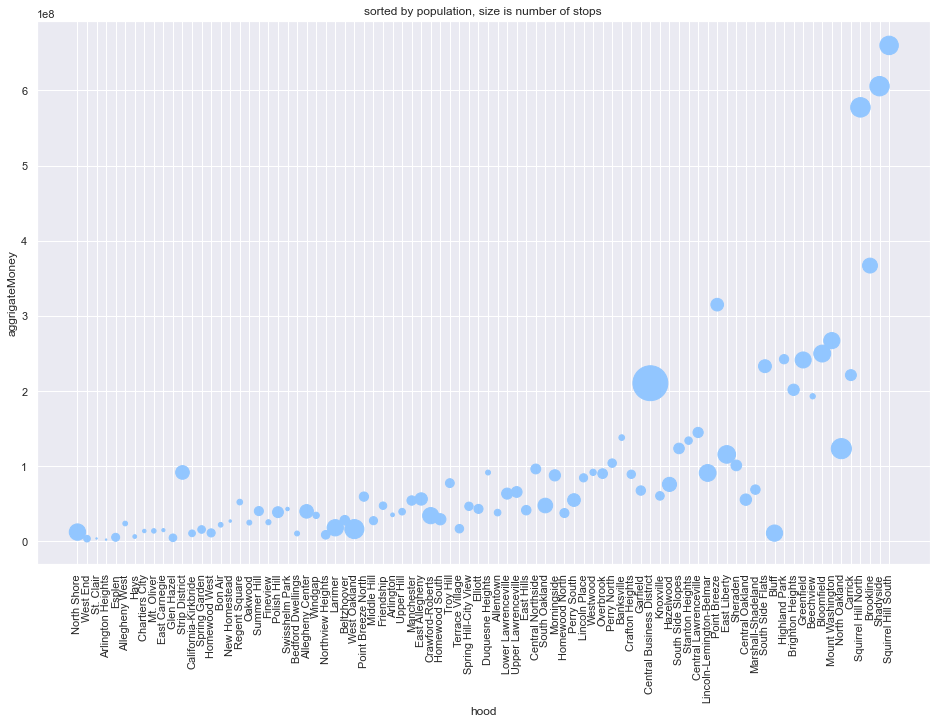

In [10]:
#Plotting out a scatter plot with weighted nodes. Grouping them by various conditions then plotting them

#population raising to the right aggriage wealth is up, size of the ball is the number of stops
counts = counts.sort_values(by=['population'], ascending='False')
counts.plot(kind='scatter', x='hood', y='aggrigateMoney', s='num_stops', figsize=(16,10), rot=90, title='sorted by population, size is number of stops')



## Analysis:
When viewing the data it would make sense for aggrigate income to grow along side population. As shown in the graph the size of the data points also increases from left to right. This would show a correlation between the rise in population as well as neighborhood income.
### Outliers:
When viewing the data I was left confused about four main data sets. The four that were way outside of the ordinary were Central Business District, Larimer, northside, and beechview. After doing some research I was able to give a brief explanation about why they didnt follow the norm. 
1. Central Business District: This is pittsburgh's downtown. Not many people live here but this is where a huge amount of the professional jobs are. It is centralized in the middle of pittsburgh's neighborhoods so many busses bring poeple from around the city here to work.  
1. Northside: There are almost no people living here and a small aggrigate income but a large amount of bus stops. The explanation for this is the large amount of offices, steelers and pirates stadiums, and entertainment in the area. The strip district shares this problem although to a lesser extent.
1. Larimer: This one left me confused for a long time. It isnt a very rich and not many people live there but there are a lot of bus stops. After doing some research on the area I noticed that bakery square is in that neighborhood. Bakery square has many of Pittsburgh's important tech companies such as google. There are still a strange amount of stops due to the conditions but the large nature of the companies and the amount of offices gives some explanations to why its there 
1. Beechview: This one was weird, the high population and wealth of the neighborhood should give it a much higher amount of stops. By checking more data I was able to find that the "T" light rail cuts directly though the neighborhood. The T isnt tracked in my data giving Beechview a blind spot in the dataset.

Talk about bluff at some point in relation to getting downtown and the hill

## Plotting
### money by number of stops with weight being population
This is a reforming of the data set. I reorganied it to show how number of bus stops grow from left to right. On the Y axis aggrigate income is tracked, and the weight is population. I did this to see if population is growing in conjunction with the money and bus stops. 

<AxesSubplot:title={'center':'sorted by bus stops, size is population'}, xlabel='hood', ylabel='aggrigateMoney'>

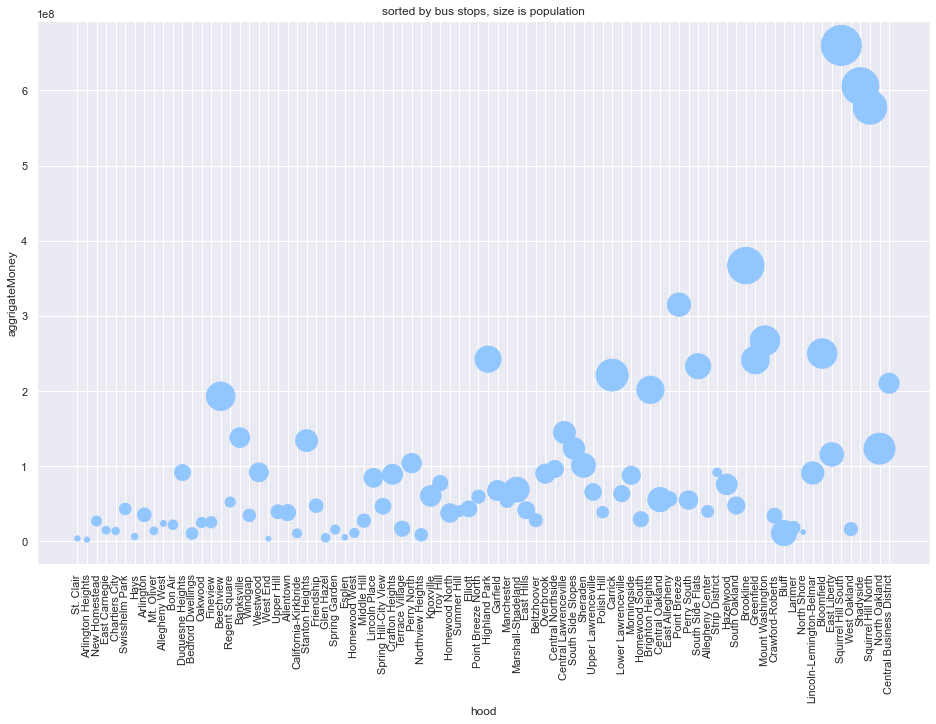

In [11]:
#the right side is num stops, up is money and size is population
counts = counts.sort_values(by=['num_stops'], ascending='False')
counts.plot(kind='scatter', x='hood', y='aggrigateMoney', s=counts['population']*.1, figsize=(16,10), rot=90, title='sorted by bus stops, size is population')



## Analysis
For the most part points follow a linear relationship. The points also grow over time showing that as money and population grow so does the amount of bus stops in the area. 
Some major Outliers

## Takeaways
A main problem with the relationship between money, population, and bus access is that when you really get to thinking about it you understand that people with easy access to money are more able to afford a car and parking. In a perfectly equitable world lower income neighborhoods would have a higher amount of bus stops. The neighborhoods of squirrelhill North, South, and shadyside all have the highest average amount of wealth, population, and bus stop. It's good that these neighborhoods all have a lot of bus stops but it does pose a problem where the people who live in these neighborhoods can more easily afford cars than those in lower income neighborhoods. This poses the question of do the people living here need such easy access to busses or would resources be better spent if funding was diverted to different communities. 

The Neighborhoods Bluff and West Oakland were outliers in the data. The reason for their data not following the norm is due to geography. Since most of the traffic from the east end going downtown flows through Bluff and West Oakland there are a disproportionate amount of stops per income and population. A question imerges of why dont they run more routes through the hill district which is north of these neighborhoods. They have a larger population and are close geographically to downtown yet get a fraction of the stops. The hill has a moderate population and a lower income yet it has a less than regular amount of stops. This shows busses may have more of an inpact for the community if they flowed equally through those neighborhoods yet they avoid the place. while busses have easier path going from the popular squirrel hill neighborhood to CMU, PITT, then ultimatly downtown that doesnt help the fact that lower income areas like neighborhoods in the hill are often underrepresented by Pittsburgh's bus systems.  

Another thing I discovered is that the west end as a whole is severly lacking in bus stops. It usually scores on the lower half of bus stop access while getting average scores in population and income. This could be due to the logistics of busses navigating the many bridges connecting downtown to the west end. It could also be a lack of population. 

In [12]:
#reading in neighborhood shape files to use in a map
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

## Location Based visualization
Doing some Geopandas mapping to give a better visualization on how bus stops, population, and Aggragate income. Its a heat map showing which neighborhoods have the strongest link to the data

<AxesSubplot:>

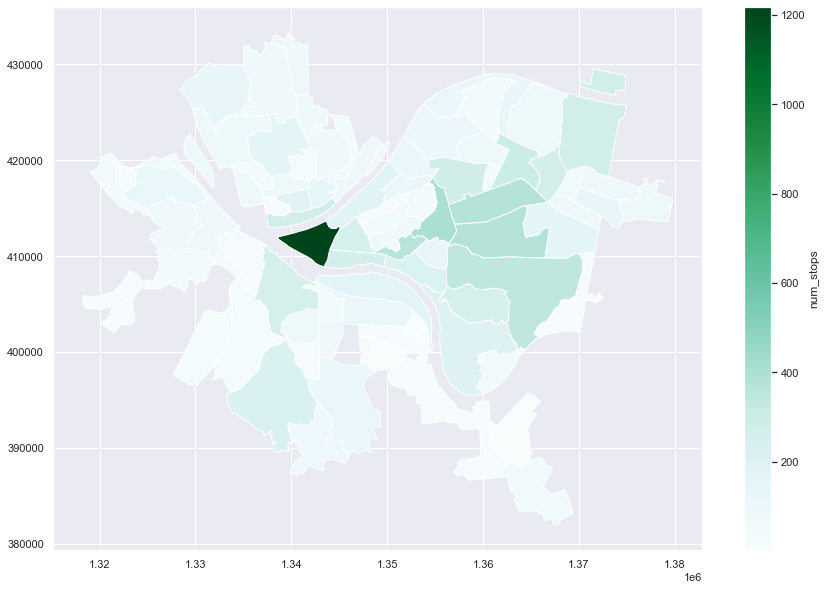

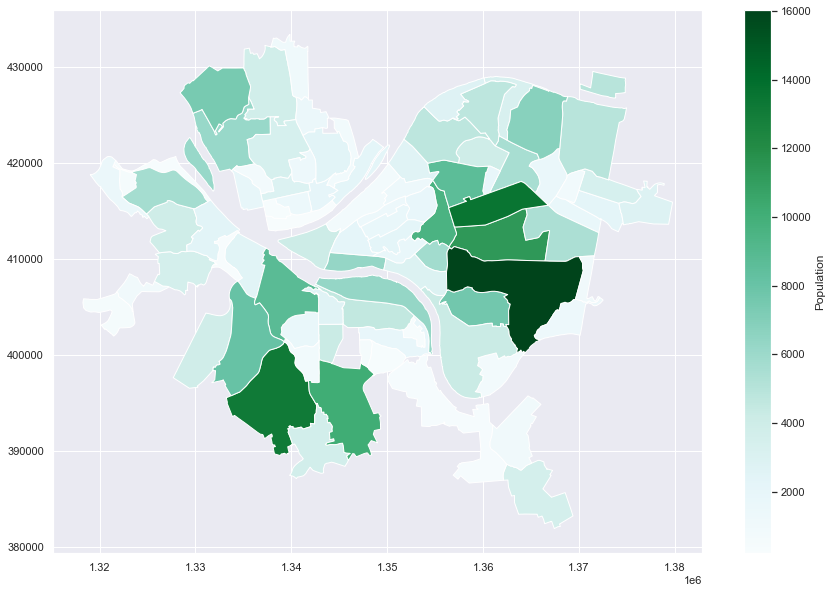

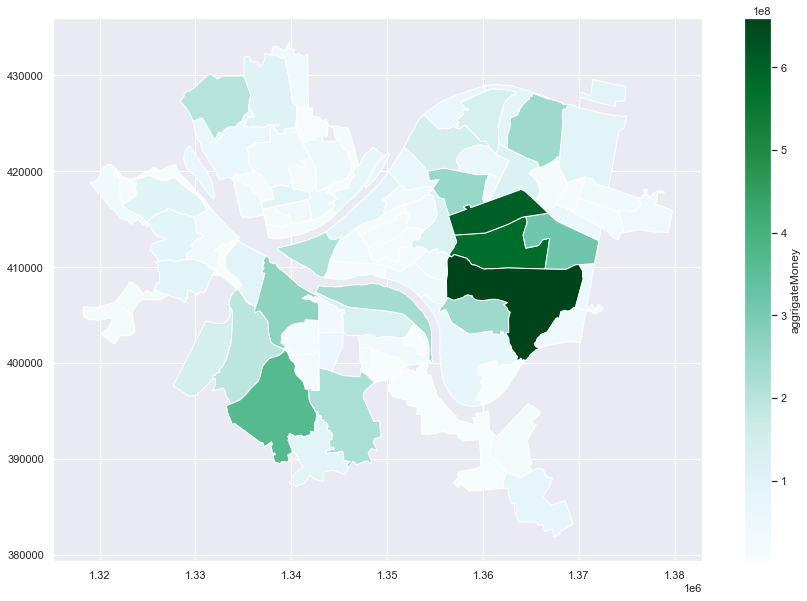

In [13]:
#merging the data with the map data then plotting it
df_map = neighborhoods.merge(counts, how='left', left_on='hood', right_on='hood')
df_map.head()
df_map.plot(column=df_map['num_stops'],# set the data to be used for coloring
               cmap='BuGn',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "num_stops"}, # label the legend
               figsize=(15, 10),
                alpha=1# set the size # set disctricts with no data to gray
               )

df_map.plot(column='population',# set the data to be used for coloring
               cmap='BuGn',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Population"}, # label the legend
               figsize=(15, 10)# set the size # set disctricts with no data to gray
               )

df_map.plot(column='aggrigateMoney',# set the data to be used for coloring
               cmap='BuGn',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "aggrigateMoney"}, # label the legend
               figsize=(15, 10),# set the size # set disctricts with no data to gray
               )

## Ethical Considerations. 
Some consequences I can see is that people who live in richer areas who are used to buses might see it as a personal attack against what they do have. Other people may misconstrue it as saying that only poor people take buses and people from communities with low aggregate money don't ever drive. People might take my finding and claim there is a strong bias against struggling communities when it turns out it's really a logistics problem caused by geography. There could be a high population community who has money that doesn't really need the bus that could be serviced before a low income smaller population. It would appeal to people who need to take the bus but aren't getting adequate service. 

## Failed Attemps
Some things I tried when working on the data was I tried to incorperate average On's and Off's when assesing the data but I couldnt find a use for it that would be helpful enough to justify the work.
![title](FailedAttempt.png)

When doing the work I went through a few different visualization types, I tried using seaborn as well as matplot before deciding to use the build in plot function with df.plot(). This is using seaborn which is a bit more confusing and its harder to make it look nice.
![title](FAIL.png)


I spent a lot of time getting the scatter plots perfect. There are many ways to mix and match them and with 3 variables to consider when plotting it was hard to keep track of what the data was trying to say. If I were to redo this project I might include more visualizations including the population, money, and stops but reformed in a different way to give a different message. I would also take into account average ons and offs to show who is using the busses they had access to. 

![title](oopsies.png)
This graph shows how income relates to population. There obviously is a link to population and aggrigate wealth so including this dataset would be misleading and unhelpful. Seeing Bluff as a major outlier was helpful in understanding how geography impacted the amount of routes however. 

## Why I chose my visualization type?
The main reason I chose my visualization type was that I wanted to compare 3 data points togethor while also keeping track of what neighborhood they came from. The methods I used to display 4 pieces of information were: sorting the data based, using the y, axis, keeping neighborhoods along the x axis, then using weights for the points. By doing this I was able to display a large amount of data that is easy to understand in one graph. All my data already had easy access to location data and I think that viewing a map of pittsburgh and its neighborhoods gives some useful geographic data as to why the busses are the way they are. 


# Thanks for reading!!!
![title](smilie.png)

### Sources: 
#### I got all data sets from the WPRDC 
Bus stop usage https://data.wprdc.org/dataset/prt-transit-stop-usage/resource/3f40b94b-4ac4-48f1-8c61-8439d2d2f420

Neighborhood population https://data.wprdc.org/dataset/pittsburgh-american-community-survey-data-household-types/resource/74deca7d-b398-4137-83d7-553a7162f464

Neighborhoods https://data.wprdc.org/dataset/neighborhoods2 (I used this for the bus stops in GIS)

Aggragate Income https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/41d215a7-6baf-4de8-8593-d25c858d3546